# Analysis of NYC Airbnb Listings and Price-Determining Factors

By: Advait Kulkarni

## Introduction:

Prices of Airbnb listings in New York City can be influenced by a variety of reasons. The neighborhood, types of rooms, service fee, reviews, and more can all influence how much an individual pays for a listing. This research project takes a dive into these aforementioned factors and attempts to identify what the most significant are in determining prices for these listings. This information can enhance both those booking and listing rooms on AirBnB about the amount of money they can expect to pay/receive for certain types of rooms in NYC.

The following code instantiates the AirBnB file and cleans the dataset while converting it from a CSV to a Pandas data frame.

In [10]:
import csv
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Download data - just have it be the relative path instead

airbnbs = "Airbnb_Open_Data.csv"

# open csv file as a python file
abs = pd.read_csv(airbnbs)

# clean the data
abs.info()
abs.isnull().sum()
abs.dropna()
abs = abs[abs['minimum nights'] >= 0]
abs = abs[abs['minimum nights'] <= 60]

# Remove dollar sign and commas, and convert to numeric for 'price' and 'service fee'
abs['price'] = abs['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
abs['service fee'] = abs['service fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Keep only the rows where the 'neighbourhood group' is one of the specified values
valid_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Bronx', 'Staten Island']
abs = abs[abs['neighbourhood group'].isin(valid_groups)]

# Verify the result by checking the unique values in 'neighbourhood group'
print(abs['neighbourhood group'].unique())


<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:23: SyntaxWarning: invalid escape sequence '\$'
<>:22: SyntaxWarning: invalid escape sequence '\$'
<>:23: SyntaxWarning: invalid escape sequence '\$'
/var/folders/t1/5f1c2tmd4gjbr5cqg8zf_yg00000gn/T/ipykernel_24323/3799158780.py:22: SyntaxWarning: invalid escape sequence '\$'
  abs['price'] = abs['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/t1/5f1c2tmd4gjbr5cqg8zf_yg00000gn/T/ipykernel_24323/3799158780.py:23: SyntaxWarning: invalid escape sequence '\$'
  abs['service fee'] = abs['service fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/t1/5f1c2tmd4gjbr5cqg8zf_yg00000gn/T/ipykernel_24323/3799158780.py:12: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  abs = pd.read_csv(airbnbs)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

The following code plots the overall price of listings in relation to the type of neighborhood they are in. We can see that the price is relatively consistent across all neighborhoods at about $625 total.

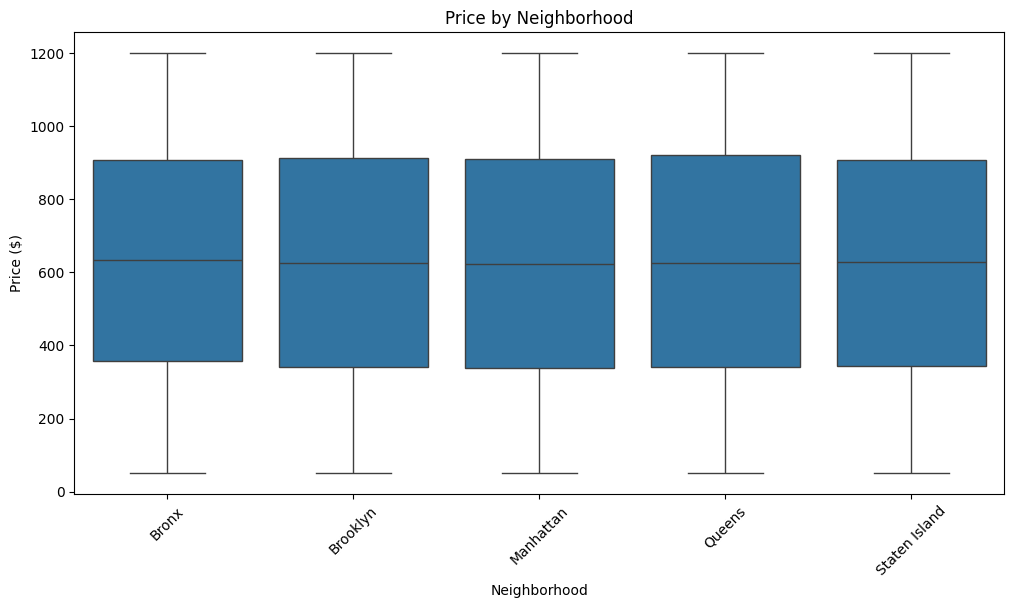

In [11]:
# Price vs Neighborhood Group (Boxplot)
neighbourhood_order = sorted(abs['neighbourhood group'].unique())

# Plot the boxplot with 'neighbourhood group' ordered alphabetically
plt.figure(figsize=(12,6))
sns.boxplot(x='neighbourhood group', y='price', data=abs, order=neighbourhood_order)
plt.title('Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

The following code plots the overall price of listings in relation to the type of rooms they have. We can see that again the price is relatively consistent across all room types at about $625 total. The shared room is slightly higher at about $650 total.

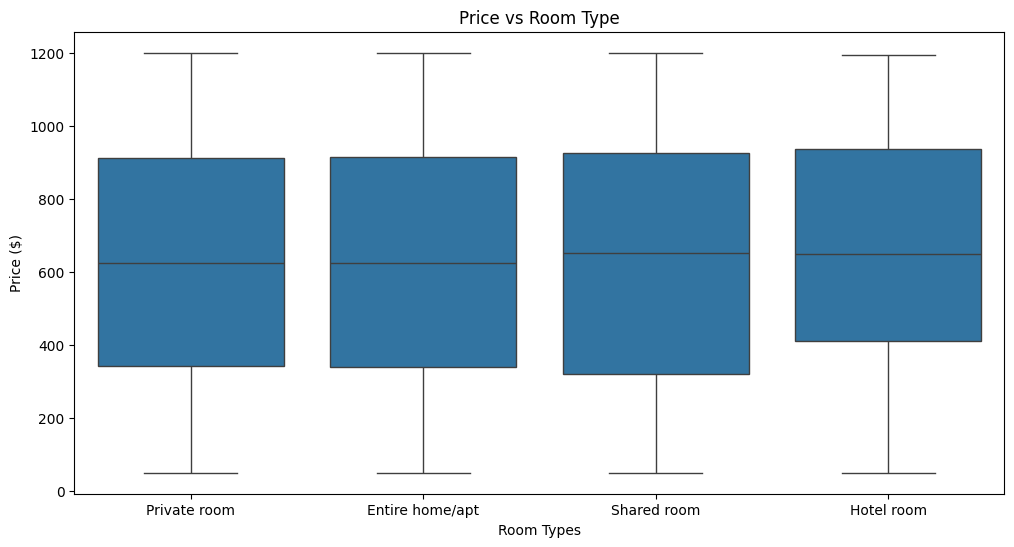

In [12]:
# Price vs Room Type (Boxplot)
plt.figure(figsize=(12,6))
sns.boxplot(x='room type', y='price', data=abs)
plt.title('Price vs Room Type')
plt.xlabel('Room Types')
plt.ylabel('Price ($)')
plt.show()

The following code plots the total count of listings in each neighborhood. Within each neighborhood it shows how many listings are from different types of room types.

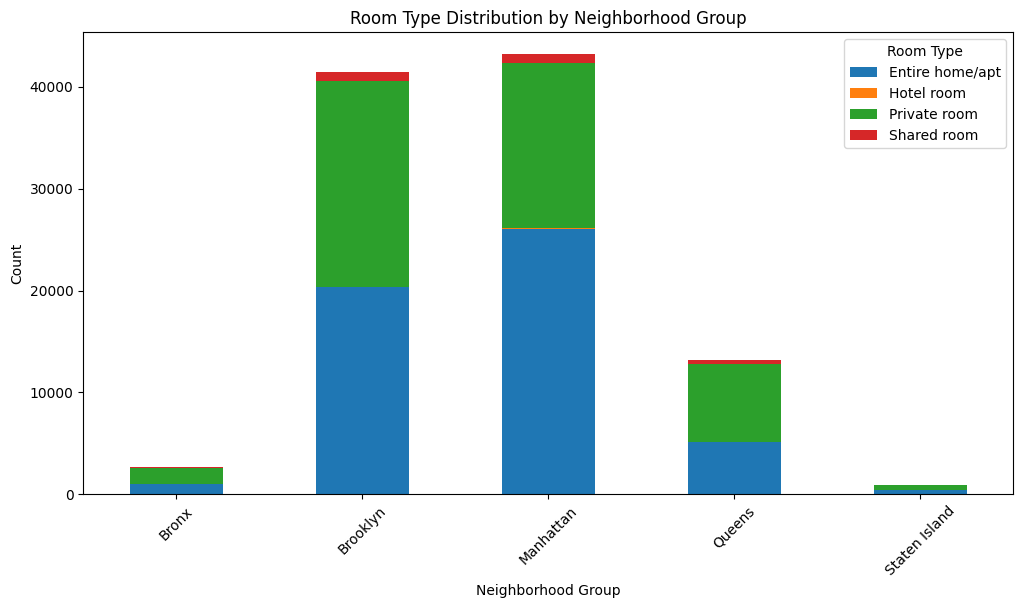

In [13]:
# Stacked bar plot for room type within neighborhood group
room_type_counts = abs.groupby(['neighbourhood group', 'room type']).size().unstack()
room_type_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Room Type Distribution by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Room Type')
plt.show()

The following code plots the price of each listing in relation to the service fee. This seems to be a very strong relationship.

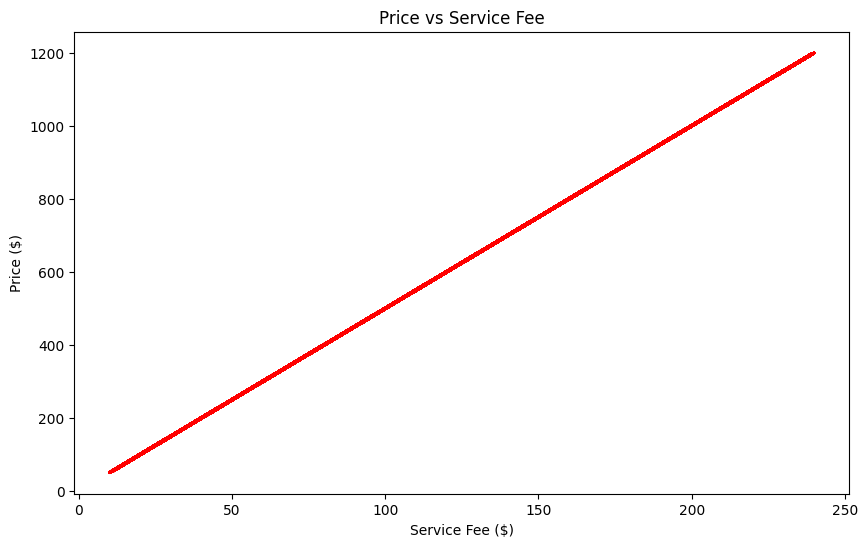

In [14]:
# Price vs Service Fee
plt.figure(figsize=(10,6))
plt.plot(abs['service fee'], abs['price'], linestyle='-', color='r')
plt.title('Price vs Service Fee')
plt.xlabel('Service Fee ($)')
plt.ylabel('Price ($)')
plt.show()

The following code plots the price of each listing in relation to the number of reviews. This does not seem to be a very strong relationship.

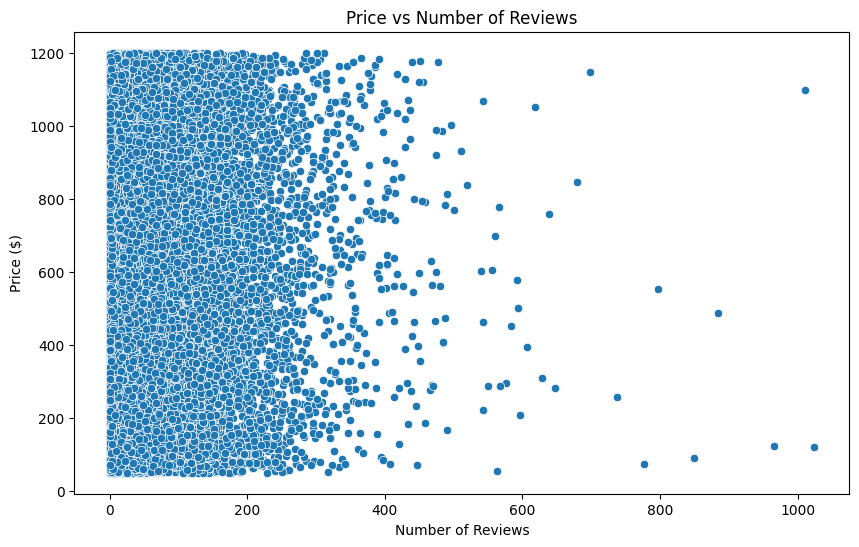

In [15]:
# Price vs Number of Reviews (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='number of reviews', y='price', data=abs)
plt.title('Price vs Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

The following code plots the price of each listing in relation to the minimum number of nights required to stay. This does not seem to be a very strong relationship.

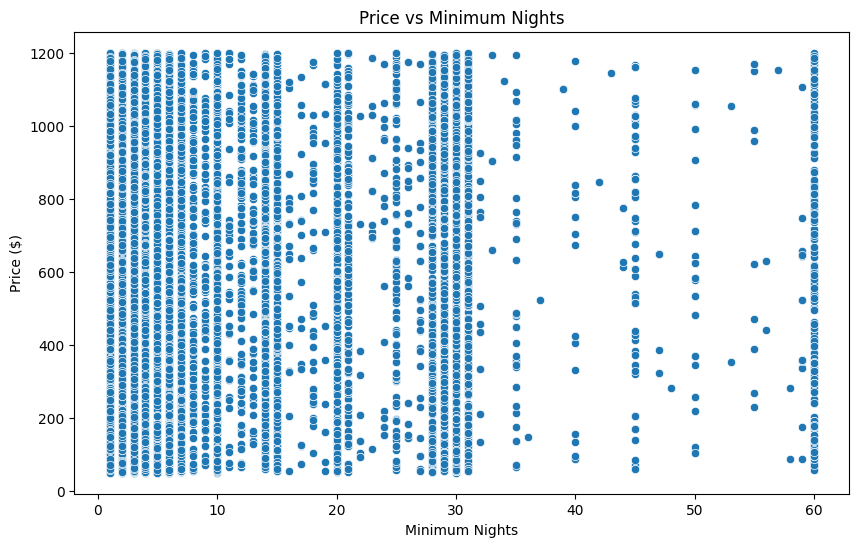

In [16]:
# Price vs Minimum Nights (Scatter Plot)
plt.figure(figsize=(10,6))
sns.scatterplot(x='minimum nights', y='price', data=abs)
plt.title('Price vs Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Price ($)')
plt.show()

The correlation matrix for price and the three numerical features previously looked at was plotted. It showed a clear correlation between the service fee and price yet weaker correlations for price and the minimum nights and number of reviews. This suggests, that the service fee is very significant in determining the price of the listing.

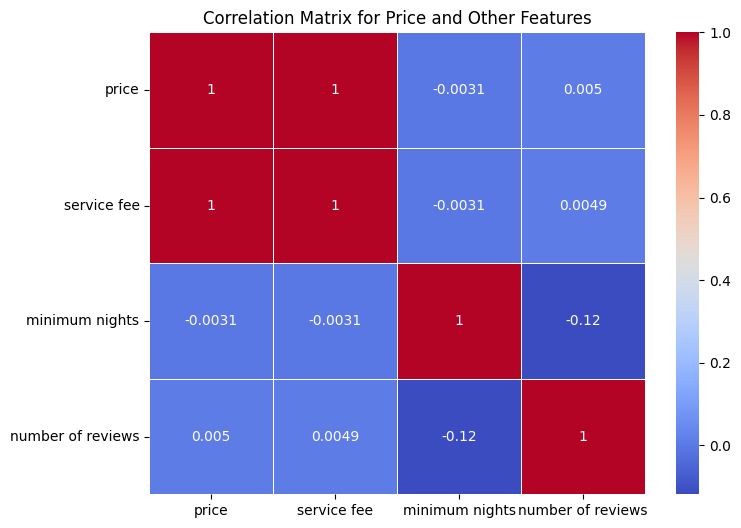

In [17]:
correlation_matrix = abs[['price', 'service fee', 'minimum nights', 'number of reviews']].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Price and Other Features')
plt.show()

# interpret the chart in plain language
# add headers
# add read.me and requirements.txt file

# Conclusion

The correlation matrix for the numerical features in the dataset reveals various insights on how different factors relate to the price of Airbnb listings in New York City. Those closely correlated are shown in red and those weakly correlated are shown in blue.
* The strongest correlation in the matrix is between price and service fee (1.0). This means that listings with higher prices tend to also have higher service fees, linking price and additional service fees closely.
* Price and minimum nights and price and number of reviews have a weak correlation (-0.0031 and 0.005, respectively). This suggests that these factors do not have a significant impact on the listing price.

Our research has shown that price and service fees are close indicators of each other.